#512,256,128

(11385, 28, 28)
Model: "AutoencoderA1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28)]          0         
                                                                 
 InputLayer (Flatten)        (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 784)               50960     
                                                                 
 reshape (Reshape)           (None, 28, 28)            0         
                                                                 
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
356/356 [==========

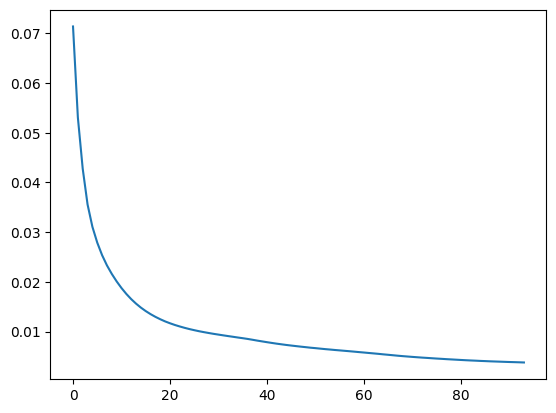

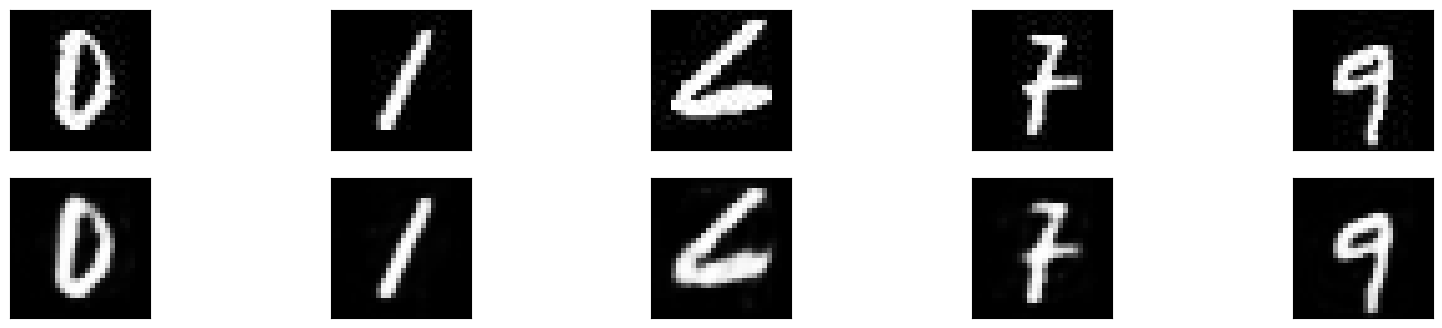

119/119 [==============================] - 0s 1ms/step
Epoch 1/10000
356/356 [==============================] - 10s 24ms/step - loss: 0.9261 - accuracy: 0.6300 - val_loss: 0.2291 - val_accuracy: 0.9399
Epoch 2/10000
356/356 [==============================] - 7s 20ms/step - loss: 0.1740 - accuracy: 0.9468 - val_loss: 0.1635 - val_accuracy: 0.9486
Epoch 3/10000
356/356 [==============================] - 8s 23ms/step - loss: 0.1322 - accuracy: 0.9575 - val_loss: 0.1330 - val_accuracy: 0.9581
Epoch 4/10000
356/356 [==============================] - 12s 35ms/step - loss: 0.1269 - accuracy: 0.9574 - val_loss: 0.1181 - val_accuracy: 0.9615
Epoch 5/10000
356/356 [==============================] - 7s 20ms/step - loss: 0.1103 - accuracy: 0.9630 - val_loss: 0.1052 - val_accuracy: 0.9618
Epoch 6/10000
356/356 [==============================] - 8s 22ms/step - loss: 0.1097 - accuracy: 0.9629 - val_loss: 0.1004 - val_accuracy: 0.9639
Epoch 7/10000
356/356 [==============================] - 7s 20ms/st

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import os,sys
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense,Input,Flatten,Reshape
from tensorflow.keras.models import Model
from keras import initializers
from tensorflow.keras.optimizers import Adam, SGD, Adagrad, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
import pickle as p
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix 

initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=100)
#print('Initializer: ',initializer)

def Upload_Dataset(Dataset_Path):
    
    Path_train_Dataset = Dataset_Path+"/train"
    Path_test_Dataset = Dataset_Path+"/test"
    Path_val_Dataset = Dataset_Path+"/val"
    
    Input_train_Dataset, Input_test_Dataset, Input_val_Dataset = [], [], []
    Output_train, Output_test, Output_val = [], [], []

    for j in os.listdir(Path_train_Dataset):

        if j != ".DS_Store":
            for k in os.listdir(Path_train_Dataset+"/"+j):
                Input_train_Dataset.append(cv2.imread(Path_train_Dataset+"/"+j+"/"+k, cv2.IMREAD_GRAYSCALE))
                if(j == '6'):
                    Output_train.append(int(2))
                elif(j == '7'):
                    Output_train.append(int(3))
                elif(j == '9'):
                    Output_train.append(int(4))
                else:
                    Output_train.append(int(j))

            for k in os.listdir(Path_test_Dataset+"/"+j):
                Input_test_Dataset.append(cv2.imread(Path_test_Dataset+"/"+j+"/"+k, cv2.IMREAD_GRAYSCALE))
                if(j=='6'):
                    Output_test.append(int(2))
                elif(j=='7'):
                    Output_test.append(int(3))
                elif(j=='9'):
                    Output_test.append(int(4))
                else:
                    Output_test.append(int(j))

            for k in os.listdir(Path_val_Dataset+"/"+j):
                Input_val_Dataset.append(cv2.imread(Path_val_Dataset+"/"+j+"/"+k, cv2.IMREAD_GRAYSCALE))
                if(j=='6'):
                    Output_val.append(int(2))
                elif(j=='7'):
                    Output_val.append(int(3))
                elif(j=='9'):
                    Output_val.append(int(4))
                else:
                    Output_val.append(int(j))
        
    #print(Output_train)            
    Input_train_Dataset, Input_test_Dataset, Input_val_Dataset = np.array(Input_train_Dataset), np.array(Input_test_Dataset), np.array(Input_val_Dataset)
    #Output_train, Output_test, Output_val = np.array(list(map(int, Output_train))), np.array(list(map(int, Output_test))), np.array(list(map(int, Output_val)))
    Output_train, Output_test, Output_val = np.array(Output_train), np.array(Output_test), np.array(Output_val)
    #print(Output_train) 
    return Input_train_Dataset, Input_test_Dataset,Input_val_Dataset, Output_train, Output_test, Output_val



#providing path of  MNIST dataset
Dataset_Path = "/content/drive/MyDrive/Group_1"


#calling Upload_Dataset function
Input_train_Dataset, Input_test_Dataset,Input_val_Dataset, Output_train, Output_test, Output_val= Upload_Dataset(Dataset_Path)
#print(Input_train_Dataset.shape,'\n')

#
Input_train_Dataset=Input_train_Dataset/255
Input_test_Dataset=Input_test_Dataset/255
Input_val_Dataset=Input_val_Dataset/255
'''bottleneck dimension'''
encodingDim=64
print(Input_train_Dataset.shape)

xInp=Input(shape=(28,28),name="img")
inp=Flatten(input_shape=(28, 28), name='InputLayer')(xInp)

encodedOut=Dense(encodingDim,activation='sigmoid')(inp)

Encoder1=Model(xInp,encodedOut,name='encoder')


decodedOut=Dense(784,activation='sigmoid')(encodedOut)
out=Reshape((28,28))(decodedOut)
optimizer=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-6,name='Adam')

Autoencoder1=Model(xInp,out,name='AutoencoderA1')
Autoencoder1.summary()

es = EarlyStopping(monitor='loss',min_delta=0.0001, patience=3,verbose=1)

Autoencoder1.compile(optimizer, loss='mse',metrics=['accuracy'])
ae1history=Autoencoder1.fit(x = Input_train_Dataset, y = Input_train_Dataset, batch_size = 32, epochs = 100, verbose = "auto", callbacks=[es], validation_data=(Input_val_Dataset,  Input_val_Dataset))
#, validation_batch_size=1

'''Reconstruction Error-2c'''
print('\nAverage reconstruction Loss :')
trainErr=Autoencoder1.evaluate(x=Input_train_Dataset,y=Input_train_Dataset,batch_size=1, verbose="auto",callbacks=None)
print('Train Data:',trainErr)

#print('\nEvaluation of model on validation data:')
valErr=Autoencoder1.evaluate(x=Input_val_Dataset, y=Input_val_Dataset, batch_size=1, verbose="auto",callbacks=None)
print('Test Data:',valErr)

#print('\nEvaluation of model on test data: Average Reconstruction Error')
testErr=Autoencoder1.evaluate(x=Input_test_Dataset, y=Input_test_Dataset, batch_size=1, verbose="auto",callbacks=None)
print('Test Data:',testErr)

'''visualization-Task2-d'''
trainReconstruct=Autoencoder1.predict(Input_train_Dataset)
plt.plot(ae1history.history['loss'])
n=5
plt.figure(figsize=(20,4))
for i in range(n):
    #displaying original image
    #clss=n
    idx=np.where(Output_train==i)[0][0]
    ax=plt.subplot(2,n,i+1)
    plt.imshow(Input_train_Dataset[idx].reshape(28,28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #displaying reconstructed image
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(trainReconstruct[idx].reshape(28,28),cmap='gray')
    #plt.imshow(trainEncode[i].reshape(8,8),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

'''Task3'''
#trainEncode=a1Encoder.predict(Input_train_Dataset)
'''Dataset used for prediction and evaluation in FCNN-Encoded data'''
trainEncode=Encoder1.predict(Input_train_Dataset)
valEncode=Encoder1.predict(Input_val_Dataset)
testEncode=Encoder1.predict(Input_test_Dataset)

'''Fcnn'''
model = keras.Sequential([
        #Flatten(input_shape=(28, 28), name='InputLayer'),
        Dense(512, activation="sigmoid", name="Hlayer1",kernel_initializer=initializer, bias_initializer=initializers.Zeros()),
        Dense(256, activation="sigmoid", name="Hlayer2",kernel_initializer=initializer, bias_initializer=initializers.Zeros()),
        Dense(128, activation="sigmoid", name="Hlayer3",kernel_initializer=initializer, bias_initializer=initializers.Zeros()),
        Dense(5, activation="softmax", name="output"),
        ])
#model.summary()

adam =Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-8,name='Adam')


model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='loss',min_delta=0.0001, patience=3,verbose=1)

model_fit = model.fit(x = trainEncode, y = Output_train, batch_size = 32, epochs = 10000, verbose = "auto", callbacks=[es], validation_data=(valEncode,  Output_val), validation_batch_size=1)

model.save('/content/drive/MyDrive/DLA4/ae32.h5')
f=open('/content/drive/MyDrive/DLA4/Histae64.pckl','wb')
p.dump(model_fit.history,f)
f.close()

'''FCNN Error'''
print('\nEvaluation of model on train data:')
trainAcc=model.evaluate(x=trainEncode,y=Output_train,batch_size=1, verbose="auto",callbacks=None)
print(model.metrics_names)
print(trainAcc)

print('\nEvaluation of model on validation data:')
valAcc=model.evaluate(x=valEncode, y=Output_val, batch_size=1, verbose="auto",callbacks=None)
print(model.metrics_names)
print(valAcc)

print('\nEvaluation of model on test data:')
testAcc=model.evaluate(x=testEncode, y=Output_test, batch_size=1, verbose="auto",callbacks=None)
print(model.metrics_names)
print(testAcc)

print('\nPredictions for test data:')
testProb=model.predict(testEncode, batch_size=1, verbose="auto", callbacks=None)
pred=np.argmax(testProb,axis=1)
print(pred)

'''3-3'''
#confusionMatrix=confusion_matrix(Output_test, pred)
confusionMatrix=confusion_matrix(Output_test,pred)
#confusionMatrix=tf.math.confusion_matrix(Output_test, pred5)
print(confusionMatrix)
